<a href="https://colab.research.google.com/github/edelgado-1975/PythonSena/blob/main/19_bases_de_datos_MySQL_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

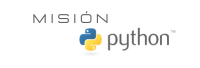

# Gestión de Bases de Datos MySQL desde Python

**¿Ventajas del SGBD MySQL?**

*   Servidor de bases de datos
*   Escalabilidad
*   Funcionalidades avanzadas
*   Soporte
*   Rendimiento



## Algunos Paquetes/Módulos para la conexión con Bases de datos MySQL desde Python

*   Python MySQL Connector
*   PyMySQL
*   MySQLDB
*   MySqlClient
*   OurSQL



## La PEP 249 Python Database API Specification

*   Establece una forma estandarizada de acceder y gestionar bases de datos
*   Contrato que deben cumplir los módulos de acceso a BD
*   Facilita el desarrollo
*   Consistencia / portabilidad

https://peps.python.org/pep-0249/



A continuación veremos algunas de las operaciones básicas con bases de datos MySQL y su equivalente en dos de las librerías más usadas

In [ ]:
con = sqlite3.connect ("base.db")

**Crear Conexión con Python MySQL Connector**


```
import mysql.connector

conn = mysql.connector.connect(
  host='localhost',
  user='usuario',
  password='contraseña',
  database='nombre_de_la_base_de_datos'
)
```

**Crear Conexión con PyMySQL**


```
import pymysql

conn = pymysql.connect(
    host='localhost',
    user='usuario',
    password='contraseña',
    db='nombre_de_la_basededatos'
)

```




**Crear un cursor con Python MySQL Connector**

```
cursor = conn.cursor()
```

**Crear un cursor con PyMySQL**

```
cursor = conn.cursor()
```

**Insertar con Python MySQL Connector**


```
def insertar_usuario(usuario, password):
  sql = "INSERT INTO usuarios (user, password) VALUES (%s, %s)"
  val = (usuario, password)
  cursor.execute(sql, val)
  conn.commit()
  print("Usuario creado con éxito")
```
**Insertar con PyMySQL**
```
def insertar_usuario(usuario, password):
  sql = "INSERT INTO usuarios (user, password) VALUES (%s, %s)"
  val = (usuario, password)
  cursor.execute(sql, val)
  conn.commit()
  print("Usuario creado con éxito")
```


**Cerrar la conexión a la BD con Python MySQL Connector**

```
conn.close()
```
**Cerrar la conexión a la BD con PyMySQL**

```
conn.close()
```



## Prerrequisitos

### Descarga e Instalación del SGBD MySQL

1.   https://dev.mysql.com/downloads/   -> MySQL Community Server
2.   Seleccionar S.O -> Go to Download Page
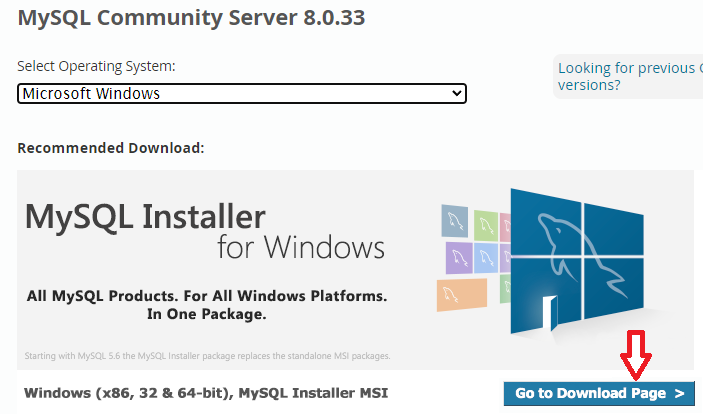



3.   Seleccionar y descargar.
4.   Instalación Full

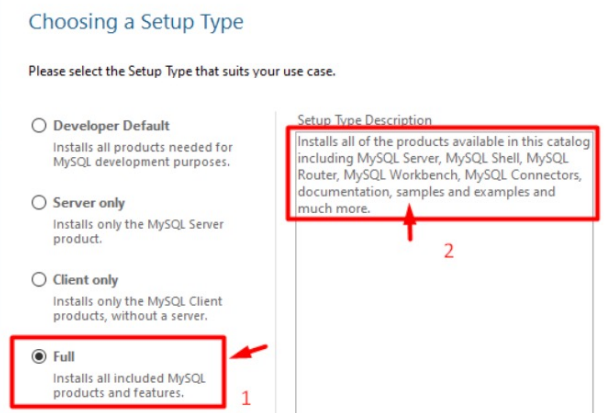



5.   Execute - Install - Next
6.   Configuración de servicios

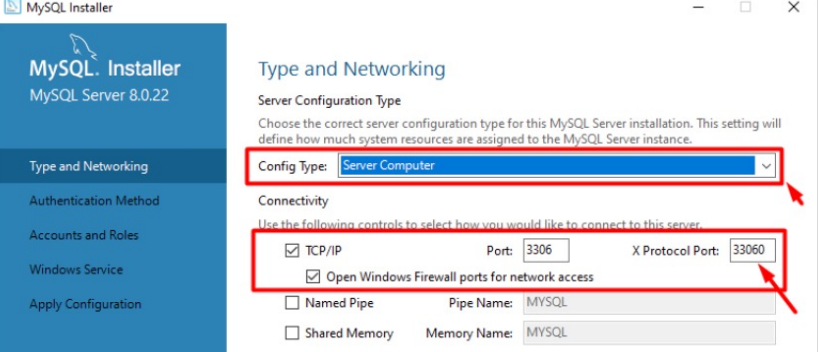



7.   Establecer contraseña root y ¡recordar!!
8.   Next -> Finish



### Instalación del módulo seleccionado para la conexión Python - MySQL

Para Python MySQL Connector :  **pip install mysql-connector-python**

Para PyMySQL : **pip install PyMySQL**

Una vez tengamos instalado y correctamente funcionando MySQL e instalado el módulo con el cual conectaremos a Python con MySQL ya podemos crear nuestros programas.

## Conexión con el servidor y la base de datos.

Para las siguientes prácticas usaremos la librería **Python MySQL Connector**.  Los programas los realizaremos en local y nos conectaremos a nuestro servidor local de MySQL.



Para tener acceso a las diferentes funciones del módulo Python MySQL Connector debemos importarlo con la siguiente instrucción

```
import mysql.connector
```



Al momento de conectarnos con una base de datos de servidor como MySQL, debemos proporcionar algunos parámetros que permitan dicha conexión.  Estos parámetros son:

*   **host** es la ruta/url donde se encuentra el servidor de la BD.  En caso de estar accediendo al servidor local el valor es **127.0.0.1** o **localhost**
*   **database** En un servidor de bases de datos se alojan varias bases de datos, así que no solo basta con indicar el servidor sino que además debemos indicar con cuál BD nos conectaremos.
*   **user** Es el username que utilizamos al conectarnos con MySQL.  Por defecto este es **root**
*   **password** Es la contraseña que se proporcionó al usuario root al momento de la instalación de MySQL.



El siguiente programa (en local) permite la conexión con la base de datos tienda que creamos previamente.   Importante que ingresen el password correspondiente a su cuenta root.

In [ ]:
import mysql.connector

conexion = mysql.connector.connect(host='localhost',
                                   database='tienda',
                                   user='root',
                                   password='mi_password')
if conexion.is_connected():
    print ("Conexion exitosa a la base de datos")

conexion.close()

Ejemplo:

In [ ]:
import mysql.connector
from tabulate import tabulate

conexion = mysql.connector.connect(host='localhost',
                                   database='tienda',
                                   user='root',
                                   password='TU password')
if conexion.is_connected():
    print ("Conexion exitosa a la base de datos")
    categoria = input ("Ingrese una categoria: ")
    c = conexion.cursor()
    consulta = """Select productos.nombre, productos.cantidad
                  from productos, categorias
                  where categorias.codigo = productos.categoria
                  and categorias.nombre = %s
               """
    c.execute(consulta,(categoria,))
    res = c.fetchall()
    print(tabulate(res, tablefmt="fancy_grid"))

conexion.close()

### Manejar una única conexión

Para evitar el estar conectándonos y desconectándonos a la base de datos y los problemas de rendimiento que ello podría traer.  Es una buena práctica el tener una clase que se encargue de crear la conexión y una vez creada entregarla a quien la necesite sin necesidad de acceder de nuevo a la base de datos.  

Se trata de una versión simplificada y a la medida del patrón de diseño Singleton


Creemos un archivo Python el cual podemos llamar **conexion_singleton.py**  con el siguiente código:

In [ ]:
import mysql.connector
class ConexionSG:
    __conexion = None

    @staticmethod
    def get_conexion(bd):
        if ConexionSG.__conexion == None:
            ConexionSG.__conexion = mysql.connector.connect(host='localhost',
                                                  database=bd,
                                                  user='root',
                                                  password='tu_password')
        return ConexionSG.__conexion

### Manejar un pool de conexiones
Un pool de conexiones es un conjunto de conexiones disponibles almacenadas en memoria para ser entregadas cuando sean requeridas y regresadas al pool después de ser utilizadas.  

**¿Ventajas de tener un pool de conexiones?**

*   Velocidad / rendimiento
*   Escalabilidad
*   Control



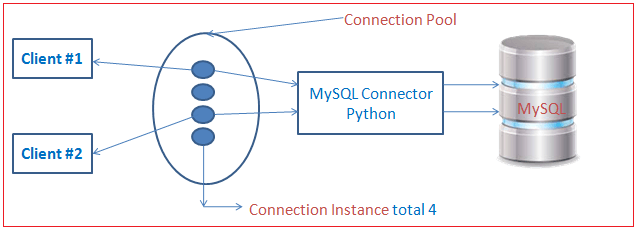

Para crear un pool de conexiones requerimos importar el submódulo **pooling**


```
from mysql.connector import pooling
```

Para crear el pool de conexiones, usamos la clase **MySQLConnectionPool** la cual recibe en su constructor los siguientes parámetros:


*   *pool_name* nombre del pool de conexiones
*   *pool_size* número de conexiones del pool
*   *pool_reset_session* indica si las variables de sesión son reiniciadas al devolver una conexión al pool
*   y los demás parámetros de conexión a la base de datos: *host*, *database*, *user*, *password*

```
mi_pool = pooling.MySQLConnectionPool(pool_name="nombre_pool",
                                                  pool_size=5,
                                                  pool_reset_session=True,
                                                  host='localhost',
                                                  database='base_datos',
                                                  user='usuario',
                                                  password='mi_password')
```

Una vez creado el pool de conexiones podemos tomar una conexión de este usando el método **get_connection()**


```
conexion1 = mi_pool.get_connection()
```

A partir de este momento ya podremos trabajar con la conexión.  La conexión es regresada automáticamente al pool cuando la cerramos con el método **close()**

```
conexion1.close()
```

Crearemos un pool de 2 conexiones y utilizaremos una de ellas

In [ ]:
import mysql.connector
from mysql.connector import pooling

#Creando el pool de conexiones
mi_pool = pooling.MySQLConnectionPool (pool_name = 'pool',
                                       pool_size = 2,
                                       pool_reset_session = True,
                                       host = 'localhost',
                                       database = 'tienda',
                                       user = 'root',
                                       password = 'root04984')

conexion1 = mi_pool.get_connection() #obtenemos una conexion del pool
cursor = conexion1.cursor()
cursor.execute ("SELECT * FROM productos")
result = cursor.fetchall()
print (result)
conexion1.close() #se regresa la conexión al pool

## Insertar datos en la base de datos

Haciendo uso de la clase ConexionSG creada dentro del archivo *conexion_singleton.py*, el código para insertar datos en la BD sería el siguiente:


In [ ]:
import mysql.connector
from conexion_singleton import ConexionSG

conexion = ConexionSG.get_conexion("tienda")
cursor = conexion.cursor()
cursor.execute ("""INSERT INTO categorias
                   (codigo, nombre) VALUES
                   (333, 'Infantil')""")
conexion.commit()

## Modificar datos


In [ ]:
import mysql.connector
from conexion_singleton import ConexionSG

conexion = ConexionSG.get_conexion("tienda")
cursor = conexion.cursor()
cursor.execute ("UPDATE categorias SET nombre =%s WHERE codigo =%s",("niños",333))
conexion.commit()

## Eliminar datos

In [ ]:
import mysql.connector
from conexion_singleton import ConexionSG

conexion = ConexionSG.get_conexion("tienda")
cursor = conexion.cursor()

sql = "DELETE FROM categorias WHERE codigo =%s"
parametros = (333,)
cursor.execute (sql, parametros)
conexion.commit()

## Consultar datos



In [ ]:
import mysql.connector
from conexion_singleton import ConexionSG

conexion = ConexionSG.get_conexion("tienda")
cursor = conexion.cursor()
cursor.execute("SELECT * FROM productos")
print (cursor.fetchall())

## Mostrar datos registro a registro


In [ ]:
import mysql.connector
from conexion_singleton import ConexionSG

conexion = ConexionSG.get_conexion("tienda")
cursor = conexion.cursor()
cursor.execute("SELECT * FROM productos")
for registro in cursor.fetchall():
    print (f"codigo ={registro[0]}")
    print (f"nombre ={registro[1]}")
    print (f"cantidad ={registro[2]}")
    print (f"precio ={registro[3]}")

## Mostrar datos usando el nombre del campo

Para que podamos acceder a los campos de resultado no através de su índice sino a través del nombre del campo, debemos crear el cursor de la siguiente manera:


```
cursor = conexion.cursor(dictionary=True)
```
Miremos:



In [ ]:
import mysql.connector
from conexion_singleton import ConexionSG

conexion = ConexionSG.get_conexion("tienda")
cursor = conexion.cursor(dictionary=True) #parámetro
cursor.execute("SELECT * FROM productos")
for registro in cursor.fetchall():
    print (f"codigo ={registro['id']}") #acceso a través del nombre del campo
    print (f"nombre ={registro['nombre']}")
    print (f"cantidad ={registro['cantidad']}")
    print (f"precio ={registro['preciounidad']}")

In [ ]:
import mysql.connector
from conexion import ConexionSG
from tabulate import tabulate

conexion = ConexionSG.get_conexion("tienda")
cursor = conexion.cursor(dictionary=True) #parámetro
cursor.execute("SELECT * FROM productos")
print(tabulate(cursor.fetchall()))

## Gestión de errores y excepciones

La clase **Error** del módulo mysql.connector permite gestionar los errores y las excepciones que se presentan con la gestión de BD MySQL desde Python.  Podemos importar esta clase de la siguiente manera:

```
from mysql.connector import Error
```
Siempre es una buena práctica usar gestión de excepciones para todas las operaciones que intentemos realizar de acceso y manipulación de bases de datos

```
from mysql.connector import Error

try:
    código que accede y manipula una BD

except Error as e:
    print ("error ocurrido:", e)

finally:
    cerrar conexiones abiertas
```





In [ ]:
import mysql.connector
from mysql.connector import Error
from mysql.connector import pooling

#Creando el pool de conexiones
try:
    mi_pool = pooling.MySQLConnectionPool (pool_name = 'pool',
                                           pool_size = 2,
                                           pool_reset_session = True,
                                           host = 'localhost',
                                           database = 'tienda',
                                           user = 'root',
                                           password = 'root04984')

    conexion1 = mi_pool.get_connection() #obtenemos una conexion del pool
    cursor = conexion1.cursor()
    cursor.execute ("SELECT * FROM productos")
    result = cursor.fetchall()
    print (result)

    conexion2 = mi_pool.get_connection() #obtenemos una conexion del pool
    cursor2 = conexion2.cursor()
    cursor2.execute ("SELECT * FROM categorias")
    result2 = cursor2.fetchall()
    print (result2)



    conexion3 = mi_pool.get_connection() #obtenemos una conexion del pool
    cursor3 = conexion3.cursor()
    cursor3.execute ("SELECT nombre FROM categorias")
    result3 = cursor3.fetchall()
    print (result3)

    conexion1.close()
    conexion2.close()
    conexion3.close()
except Error as e:
    print(e)

## Apropiación

Cree una BD en MySQL para la toma de decisiones en una unidad productiva de tipo agrícola.  La BD requiere guardar información sobre las enfermedades, sus características y sus respectivos tratamientos.  

Desde Python conectar con la BD y presentar el siguiente menú:


```
1. Ingresar BD de Conocimiento: Inserta el nombre de la enfermedad, un listado de sus características y el tratamiento
2. Pronosticar enfermedad: Ingresa una o varias características y devuelve la(s) posible(s) enfermedad(es) en el cultivo.
3. Consultar tratamiento: Ingresa el nombre de una enfermedad y muestra el tratamiento que se debe seguir
```

